In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv("profiles.csv")

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [6]:
df.isnull().sum() / len(df)

age            0.000000
body_type      0.088346
diet           0.406950
drinks         0.049795
drugs          0.234878
education      0.110566
essay0         0.091549
essay1         0.126314
essay2         0.160778
essay3         0.191439
essay4         0.175775
essay5         0.180996
essay6         0.229723
essay7         0.207704
essay8         0.320705
essay9         0.210239
ethnicity      0.094752
height         0.000050
income         0.000000
job            0.136756
last_online    0.000000
location       0.000000
offspring      0.593217
orientation    0.000000
pets           0.332316
religion       0.337404
sex            0.000000
sign           0.184433
smokes         0.091949
speaks         0.000834
status         0.000000
dtype: float64

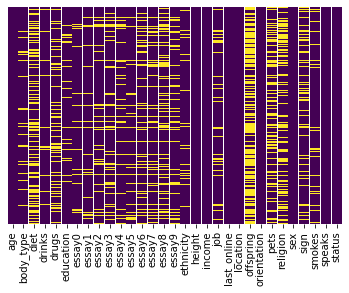

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#removing those column whose missing value is greater than 35%
df.drop(['diet','pets','offspring'],axis=1,inplace=True)

In [9]:
df['body_type'].fillna(df['body_type'].mode()[0], inplace=True)
df['drinks'].fillna(df['drinks'].mode()[0], inplace=True)
df['drugs'].fillna(df['drugs'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['ethnicity'].fillna(df['ethnicity'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['religion'].fillna(df['religion'].mode()[0], inplace=True)
df['sign'].fillna(df['sign'].mode()[0], inplace=True)
df['smokes'].fillna(df['smokes'].mode()[0], inplace=True)
df['speaks'].fillna(df['speaks'].mode()[0], inplace=True)

In [10]:
df.isnull().sum() / len(df)

age            0.000000
body_type      0.000000
drinks         0.000000
drugs          0.000000
education      0.000000
essay0         0.091549
essay1         0.126314
essay2         0.160778
essay3         0.191439
essay4         0.175775
essay5         0.180996
essay6         0.229723
essay7         0.207704
essay8         0.320705
essay9         0.210239
ethnicity      0.000000
height         0.000050
income         0.000000
job            0.000000
last_online    0.000000
location       0.000000
orientation    0.000000
religion       0.000000
sex            0.000000
sign           0.000000
smokes         0.000000
speaks         0.000000
status         0.000000
dtype: float64

In [11]:
df.columns

Index(['age', 'body_type', 'drinks', 'drugs', 'education', 'essay0', 'essay1',
       'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8',
       'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online',
       'location', 'orientation', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'],
      dtype='object')

In [12]:
cols= ['body_type', 'drinks', 'drugs', 'education', 'ethnicity', 'job',
       'location', 'orientation', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status']

In [13]:
def dummy(df,col):
    drop = np.unique(df[col])[-1]
    dummy = pd.get_dummies(df[col])
    new_col = []
    for i in dummy.columns:
        new_col.append(col+'_'+str(i))
    dummy.columns = new_col
    df = pd.concat([df, dummy], axis=1)
    df.drop([col, new_col[-1]], inplace=True, axis=1)
    return df

In [14]:
empty = []
for col in cols:
    try:
        df = dummy(df,col)
    except:
        empty.append(col)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Columns: 8245 entries, age to status_single
dtypes: float64(1), int64(2), object(11), uint8(8231)
memory usage: 477.0+ MB


In [16]:
df_essay=df[['essay0', 'essay1','essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8','essay9']]

In [17]:
df.drop(['essay0', 'essay1','essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8','essay9'],axis=1,inplace=True)

In [18]:
df.drop(["last_online"],axis=1,inplace=True)

In [19]:
df.head()

,age,height,income,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,...,"speaks_english, yiddish (poorly), english (fluently)","speaks_english, yiddish (poorly), spanish (okay)","speaks_english, yiddish (poorly), spanish (okay), latin (poorly)","speaks_english, yiddish (poorly), spanish (poorly)","speaks_french (fluently), german (fluently), spanish (fluently), english","speaks_french (okay), english",status_available,status_married,status_seeing someone,status_single
0,22,75.0,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,35,70.0,80000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,68.0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,23,71.0,20000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29,66.0,-1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.04347826, 0.78723404, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.18478261, 0.73404255, 0.08000092, ..., 0.        , 0.        ,
        1.        ],
       [0.2173913 , 0.71276596, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26086957, 0.74468085, 0.1000009 , ..., 0.        , 0.        ,
        1.        ],
       [0.09782609, 0.76595745, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.22826087, 0.71276596, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [21]:
df_scaled1 = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled1

,age,height,income,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,...,"speaks_english, yiddish (poorly), english (fluently)","speaks_english, yiddish (poorly), spanish (okay)","speaks_english, yiddish (poorly), spanish (okay), latin (poorly)","speaks_english, yiddish (poorly), spanish (poorly)","speaks_french (fluently), german (fluently), spanish (fluently), english","speaks_french (okay), english",status_available,status_married,status_seeing someone,status_single
0,0.043478,0.787234,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.184783,0.734043,0.080001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.217391,0.712766,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.054348,0.744681,0.020001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.119565,0.691489,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,0.445652,0.648936,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59942,0.065217,0.755319,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59943,0.260870,0.744681,0.100001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59944,0.097826,0.765957,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
#selecting only those columns whose variance is greater than 60%
df_sub = df.iloc[:,(df_scaled1.var() > 0.06).values]

In [23]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   body_type_athletic                             59946 non-null  uint8
 1   body_type_average                              59946 non-null  uint8
 2   body_type_curvy                                59946 non-null  uint8
 3   body_type_fit                                  59946 non-null  uint8
 4   body_type_thin                                 59946 non-null  uint8
 5   drinks_often                                   59946 non-null  uint8
 6   drinks_rarely                                  59946 non-null  uint8
 7   drinks_socially                                59946 non-null  uint8
 8   drugs_never                                    59946 non-null  uint8
 9   education_graduated from college/university    59946 non-null  uint8
 10

In [24]:
print(df_sub.columns)

Index(['body_type_athletic', 'body_type_average', 'body_type_curvy',
       'body_type_fit', 'body_type_thin', 'drinks_often', 'drinks_rarely',
       'drinks_socially', 'drugs_never',
       'education_graduated from college/university',
       'education_graduated from masters program',
       'education_working on college/university', 'ethnicity_asian',
       'ethnicity_white', 'job_artistic / musical / writer',
       'job_computer / hardware / software', 'job_other',
       'job_sales / marketing / biz dev', 'job_science / tech / engineering',
       'job_student', 'location_berkeley, california',
       'location_oakland, california', 'location_san francisco, california',
       'orientation_gay', 'religion_agnosticism', 'sex_f',
       'sign_gemini and it&rsquo;s fun to think about', 'smokes_no',
       'speaks_english', 'speaks_english (fluently)', 'status_single'],
      dtype='object')


# K-Means

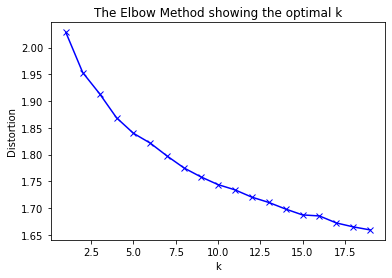

In [25]:
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_sub)
    kmeanModel.fit(df_sub)
    distortions.append(sum(np.min(cdist(df_sub, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_sub.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
kmeanModel = KMeans(n_clusters=5).fit(df_sub)
kmeanModel.fit(df_sub)

KMeans(n_clusters=5)

In [27]:
df_sub['cluster'] = kmeanModel.labels_

<ipython-input-27-e5d1dee72f27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['cluster'] = kmeanModel.labels_


In [28]:
df_sub['cluster'].head()

0    3
1    0
2    1
3    3
4    4
Name: cluster, dtype: int32

In [29]:
df_sub["cluster"].unique()

array([3, 0, 1, 4, 2])

In [30]:
df_sub

,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_thin,drinks_often,drinks_rarely,drinks_socially,drugs_never,education_graduated from college/university,...,"location_san francisco, california",orientation_gay,religion_agnosticism,sex_f,sign_gemini and it&rsquo;s fun to think about,smokes_no,speaks_english,speaks_english (fluently),status_single,cluster
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,3
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,3
4,1,0,0,0,0,0,0,1,1,1,...,1,0,1,0,0,1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,0,1,0,0,0,0,0,1,1,1,...,0,0,0,1,0,1,1,0,1,2
59942,0,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,1,0
59943,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
59944,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,4


# splitting

In [31]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(df_sub.drop(["cluster"],1),df_sub["cluster"],test_size=0.2,random_state=7)

# Naive Bayes

Multinomial NB

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
print("MN Accuracy: %0.2f%%" % (100 * clf.score(x_test, y_test)))

MN Accuracy: 92.43%


In [34]:
y_preds = clf.predict(x_test)
y_preds

array([4, 1, 2, ..., 1, 0, 2])

In [35]:
clf.score(x_test,y_test)

0.9242702251876563

In [36]:
accuracy_score(y_test,y_preds)

0.9242702251876563

In [37]:
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[2135  109  235  116   22]
 [   5 2158   46    0    7]
 [   0    0 2981    0    0]
 [   0  118  148 1717   29]
 [  73    0    0    0 2091]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2617
           1       0.90      0.97      0.94      2216
           2       0.87      1.00      0.93      2981
           3       0.94      0.85      0.89      2012
           4       0.97      0.97      0.97      2164

    accuracy                           0.92     11990
   macro avg       0.93      0.92      0.92     11990
weighted avg       0.93      0.92      0.92     11990



In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(MultinomialNB(),x_train, y_train, cv=5)

array([0.92139283, 0.92180169, 0.92524241, 0.92242728, 0.92983005])

Gaussian NB

In [39]:
from sklearn.naive_bayes import GaussianNB


In [43]:
model = GaussianNB().fit(x_train, y_train)
print("Gaussian Accuracy: %0.2f%%" % (100 * model.score(x_test, y_test)))

Gaussian Accuracy: 93.19%


In [46]:
y_pred = model.predict(x_test)
y_pred

array([4, 1, 2, ..., 1, 0, 2])

In [47]:
model.score(x_test,y_test)

0.93185988323603

In [48]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1814  109  211  193  290]
 [   5 2211    0    0    0]
 [   0    0 2981    0    0]
 [   0    0    0 2003    9]
 [   0    0    0    0 2164]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82      2617
           1       0.95      1.00      0.97      2216
           2       0.93      1.00      0.97      2981
           3       0.91      1.00      0.95      2012
           4       0.88      1.00      0.94      2164

    accuracy                           0.93     11990
   macro avg       0.93      0.94      0.93     11990
weighted avg       0.94      0.93      0.93     11990

